# Simple Linear Regression (SLR)

The closed-form solution for linear regression is described by the **Normal Equation** as follows,
    $$\theta = (X^T X)^{-1} X^T \vec{y}$$

**Vectorized prediction/hypothesis**
    $$\hat{y} = \theta^T \cdot X$$

**Loss Function**

Mean squared error (MSE) loss (y - y_hat)²
    $$MSE = \sum_{i=1}^{m} (y_i - \theta^T x_i)^2$$

### When to use the Normal Equation?
If the algorithm you want to use is in the form of a linear regression 
- If $n$ (number of features) is small
- If $m$ (number of training samples) is small (i.e. ~20,000)

If $X$ is a *non-invertible* matrix, which usually happens if you have redundant features (i.e independent variables are linearly dependent), probably because you have the same features repeated twice. One thing you can do is go and find out which features are repeated and fix them or you can use the `np.pinv` function in NumPy which will also give you the right answer.


In [8]:
# Preliminaries
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(500,1)                  # (rows, columns)
y = 2*X + 1 + 1.2*np.random.randn(500,1)    # vector of length 500
# X.shape, y.shape

def get_theta(X, y):
    # Number of training examples
    m = X.shape[0]
    # Appending a column of ones in X to add the intercept term
    X = np.append(X, np.ones((m,1)), axis=1)    
    # Reshaping y to (m,1)
    y = y.reshape(m,1)    
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return(theta)

def predict(X):
    # Appending a column of ones in X to add the intercept term
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    # Compute y_hat (the dot product of X & theta)
    preds = np.dot(X, theta)    
    return(preds)


[[1.90949642]
 [1.0388102 ]]


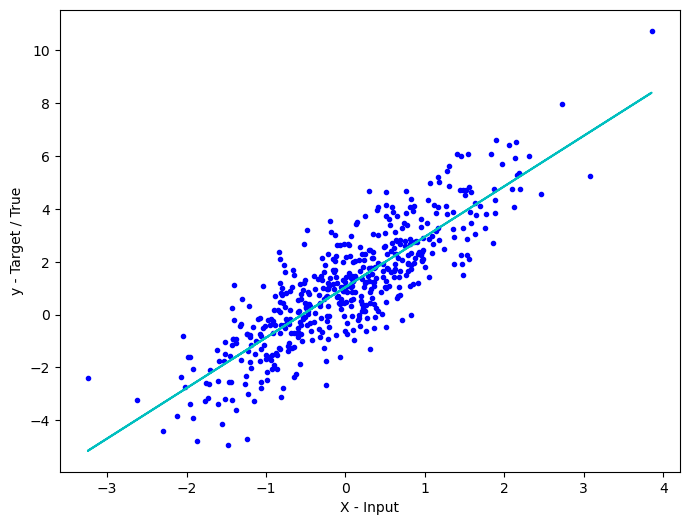

In [10]:
# Getting the value of theta using the find_theta function
theta = get_theta(X, y)
print(theta)

# Getting the predictions on X using the predict function
preds = predict(X)

# Plotting the predictions
plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - Target / True')
plt.show()

The cyan line shows the predictions for all the values of `X`

Found the optimal values of `theta`, which is the global minimum of the MSE loss function for the given data.



### Resources
- [Derivation of the Normal Equation for linear regression](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/)


